In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import random

60000
10000


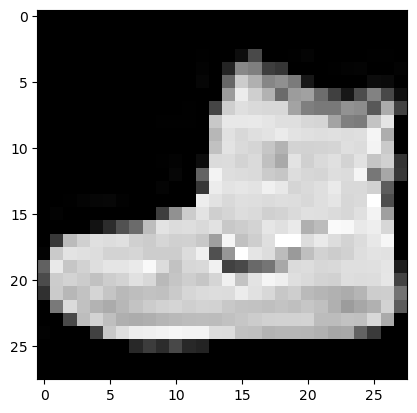

In [11]:
## download the data
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

## print length for checking if data downloaded
print(len(trainingdata))
print(len(testdata))

image, label = trainingdata[0]
plt.imshow(image.squeeze(), cmap=plt.cm.gray)


In [37]:
# adding the training and test loader making it easy for us to iterate over the data repetitively in batches of 64

trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)


In [39]:
# Seting up model
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.layer1 = torch.nn.Linear(784,256)  # input layer
        self.layer2 = torch.nn.Linear(256, 128)  # First hidden layer
        self.layer3 = torch.nn.Linear(128, 64)  # Second hidden layer
        self.layer4 = torch.nn.Linear(64, 10)  # fully connected
        self.ReLU = torch.nn.ReLU()  # ReLU activation


    def forward(self, x):
        x = x.view(-1, 784)
        x = self.ReLU(self.layer1(x))  # ReLU activation
        x = self.ReLU(self.layer2(x))  # ReLU activation
        x = self.ReLU(self.layer3(x))  # ReLU activation
        return self.layer4(x)  # output layer

In [40]:
# Perparation

# using 'cpu' since .cuda() is not available in Macbook.
device = torch.device("cpu")
model = LogisticRegression()  # Step 1: architecture
model.to(device)  # add specific device to model
loss = torch.nn.CrossEntropyLoss()  # Step 2: loss
loss.to(device)  # add specific device to loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Step 3: training method

In [41]:
train_loss_history = []
test_loss_history = []

for epoch in range(10):
    train_loss = 0.0
    test_loss = 0.0
    
    # Training model
    model.train()
    for i, data in enumerate(trainDataLoader):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        predicted_output = model(images)  # forward propagation

        optimizer.zero_grad()  # zero out any gradient values from the previous iteration
        
        fit = loss(predicted_output, labels)  # calculate our measure of goodness
        fit.backward()  # backpropagation
        optimizer.step()  # update the weights of our trainable parameters
        train_loss += fit.item()
    
        
    # Testing model
    model.eval()
    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            predicted_output = model(images)
            fit = loss(predicted_output, labels)
            test_loss += fit.item()
    train_loss = train_loss / len(trainDataLoader)
    test_loss = test_loss / len(testDataLoader)
    train_loss_history += [train_loss]
    test_loss_history += [test_loss]
    print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')


Epoch 0, Train loss 1.764303352914131, Test loss 0.9974696457765664
Epoch 1, Train loss 0.8107015037460368, Test loss 0.8076309679420131
Epoch 2, Train loss 0.6594691907863881, Test loss 0.6371283945004651
Epoch 3, Train loss 0.5871137989990747, Test loss 0.6299598086032139
Epoch 4, Train loss 0.5387292260617844, Test loss 0.5517397688072958
Epoch 5, Train loss 0.5049410053471258, Test loss 0.5248090763380573
Epoch 6, Train loss 0.47890360794786707, Test loss 0.5245469041690705
Epoch 7, Train loss 0.4607792491756523, Test loss 0.5066135830370484
Epoch 8, Train loss 0.4452500610526945, Test loss 0.4767505639487771
Epoch 9, Train loss 0.4330135866491271, Test loss 0.4874804374898315


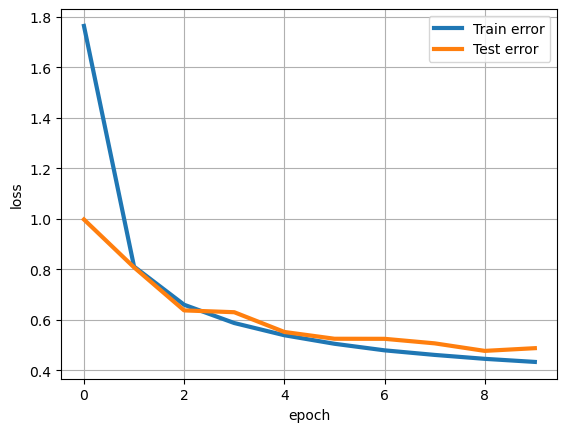

In [42]:
# Plot Train and Test error curves
plt.plot(train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

Predicted: tensor([3, 2, 7, 5, 8, 4, 5, 0, 8, 9, 1, 9, 1, 8, 1, 5])
True labels: tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5])
0.12704485654830933


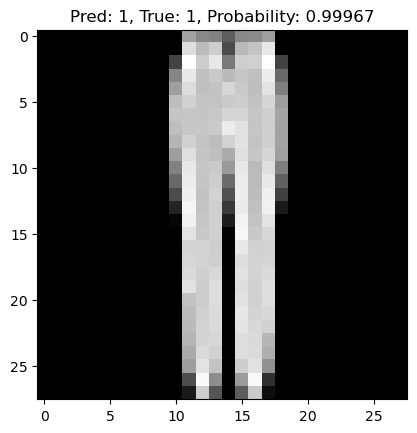

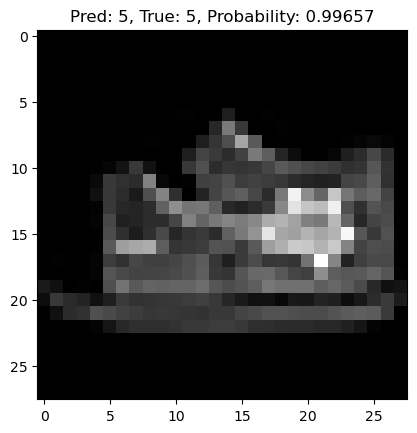

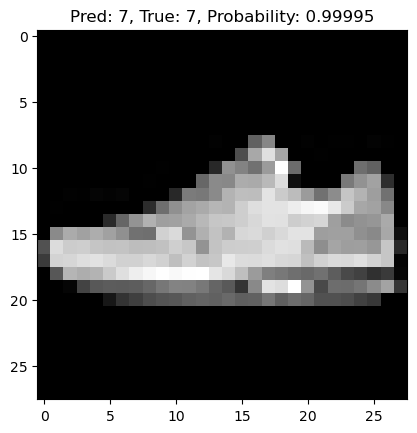

In [64]:
# Visualize samples and its prdicted probabilities
predicted_outputs = model(images)
predicted_classes = torch.max(predicted_outputs, 1)[1]
print('Predicted:', predicted_classes)
fit = loss(predicted_output, labels)
print('True labels:', labels)
print(fit.item())
probs = torch.nn.functional.softmax(predicted_output.cpu(), dim=1).detach().numpy()

for i in range(3):  # randomly select theree images to verify
    j = random.randint(0, images.shape[0] - 1)
    plt.imshow(images[j].squeeze().cpu(), cmap=plt.cm.gray)
    plt.title('Pred: {}, True: {}, Probability: {:.5f}'.format(predicted_classes[j].item(),labels[j].item(),probs[j][predicted_classes[j]]))
    plt.show()